## 1. Import Data

In [1]:
%matplotlib inline
import pandas as pd

df_raw = pd.read_csv('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/ml_fc/health_insurance_trimmed.csv', index_col=0)
df_raw

,age,gender,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.6850
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335


## 2. Analyse/Clean/Shape Data

For this example we are suggesting that age can be a predictor of health charges.

We would bring in further "independent" variables to the same training set e.g. gender, smoking etc..

In [2]:
# create a new DataFrame with just the age and charges columns
df = df_raw[ ['age', 'charges']]
df

,age,charges
1,18,1725.5523
2,28,4449.4620
4,32,3866.8552
5,31,3756.6216
6,46,8240.5896
...,...,...
1332,52,11411.6850
1333,50,10600.5483
1334,18,2205.9808
1335,18,1629.8335


array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

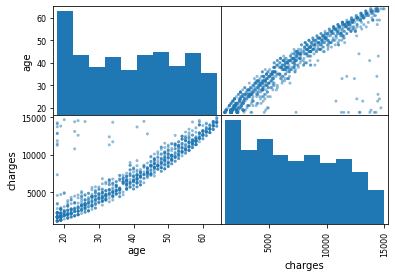

In [3]:

# add a scatter_matrix for the age/charges dataframe (import from pandas.plotting)
from pandas.plotting import scatter_matrix

scatter_matrix(df)

In [79]:
# check for nulls in the DataFrame
df.isnull().sum()

age        0
charges    0
dtype: int64

## 3. Independent / Dependant variables

In [34]:
# create a new DataFrame called X with just the age column
X = df[ ['age'] ]
# create a Series called y with just the charges column
y = df['charges']

## 4. Train/Test Split

In [68]:
from sklearn.model_selection import train_test_split

# use train_test_split to create X_train, X_test, y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## optionally use polynomial order of features

In [69]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2, include_bias=False)

## 5. Select & Train Model

In [71]:
# create a LinearRegression object from sklearn.linear_model
# pass X_train and y_train to it's 'fit' function

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(poly_reg.fit_transform(X_train), y_train)

LinearRegression()

## 6. Validation

In [78]:
# validate with r2_score form sklearn.metrics
from sklearn.metrics import r2_score

r2_score(y_test, model.predict(poly_reg.fit_transform(X_test)))

0.7868116314136628

## 7. (Optional) Visualise Results

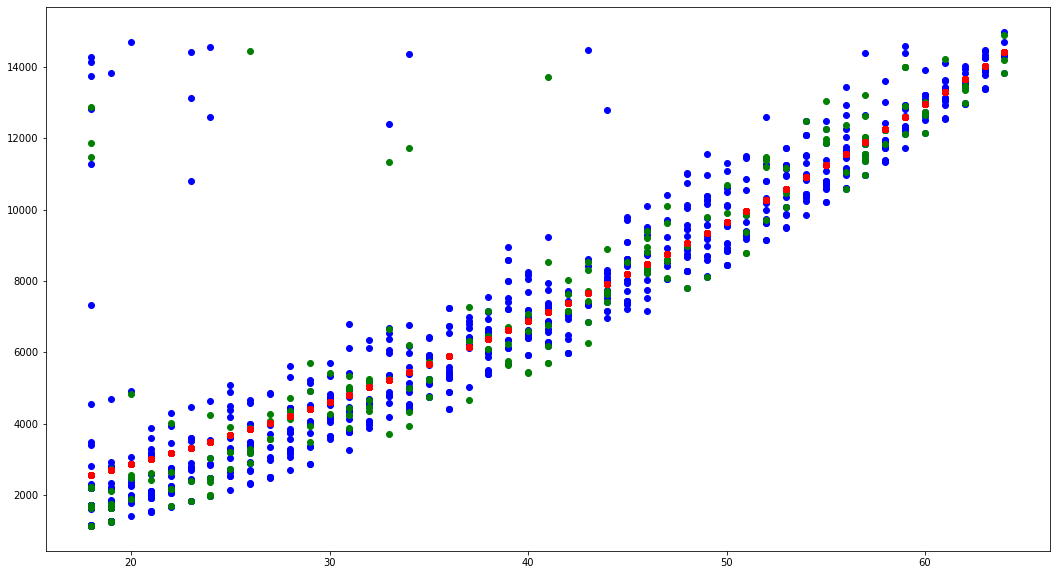

In [74]:
# scatter plot of the training data
# line plot on the same axes of the predictions from the model
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))

# the training data in blue
plt.scatter(X_train, y_train, color='b')

# test test data in green
plt.scatter(X_test, y_test, color='g')

# the models predictions in red
plt.scatter(X_train, model.predict(poly_reg.fit_transform(X_train)), color='r')

In [80]:
# prediction - e.g. what does the model predict would be the yearly charges for a person aged 44
model.predict(poly_reg.fit_transform([[44]]))

array([7927.55957782])

## Optional - compare with other models
Try Repeating training and validation using another similar model:
* ```from sklearn.linear_model import Ridge``` : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

Is this more or less accurate than the LinearRegression model?

In [82]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(poly_reg.fit_transform(X_train), y_train)

r2_score(y_test, ridge_model.predict(poly_reg.fit_transform(X_test)))

0.7868119321311002

You could similarly try using the more complex probabilistic model ```from sklearn.linear_model import BayesianRidge```

https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression

Note that this model has some optional parameters - parameters set on the model when it's created are known as "hyperparameters" i.e. these will not be adjusted during the fitting process.

In [83]:
from sklearn.linear_model import BayesianRidge

b_ridge_model = BayesianRidge()
b_ridge_model.fit(poly_reg.fit_transform(X_train), y_train)

r2_score(y_test, b_ridge_model.predict(poly_reg.fit_transform(X_test)))

0.7872296760409339